In [89]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    

In [179]:
#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 0.01956951
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
h = 6.6260755e-27
k_Bol = 1.380658e-16
B = 30.0
#n_e = 100000.


theta = np.pi/3.
epsilon = 0.01
n_e = 1
nu_c = e * B / (2. * np.pi * m * c)
#nu_c = 1.
nu = 6.5 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)

#cos_xi = np.arange(-1., 1., 2./100)
#cos_xi = 0.5
#cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))

#cos_xi = np.arange(-1, 1, 0.1)
#gamma = np.arange(1, 11, 0.1)

#def delta_function(n, gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
#    argument = (n * nu_c)/gamma - nu * (1 - beta * cos_xi * np.cos(theta))
#    f = (1/(epsilon * np.sqrt(np.pi))) * np.exp(-argument**2./epsilon**2.)
#    return f


n_dn = (nu / nu_c) * abs(np.sin(theta))
#beta_here = np.sqrt(1. - 1./((1. + theta_e)**2)) 
#ans = (theta_e + 1.) * (nu/nu_c) * (1. - beta_here**2 * (np.cos(theta))**2)
C = 10.

#def n_up(gamma):
#    beta = np.sqrt(1. - 1./gamma**2.)
#    ans = 10.* (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.)) * (nu/nu_c) * (1. - beta**2 * (np.cos(theta))**2)
#    return ans
    

In [180]:
def K_I(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx + K_yy
    return ans

def K_Q(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    K_xx = M**2 * (special.jv(n, z))**2
    K_yy = N**2 * (special.jvp(n, z, 1))**2
    ans = K_xx - K_yy
    return ans

def K_U(n, gamma):
    a = 0
    return a

def K_V(n, gamma):  
    beta = np.sqrt(1. - 1./gamma**2.)  
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    ans = - 2. * M * N * special.jv(n, z) * special.jvp(n, z, 1)
    return ans

def T_O():
    nume = 2. * nu * np.cos(theta)
    demo = nu_c * (np.sin(theta))**2 - np.sqrt(nu_c**2 * (np.sin(theta))**4 + 4. * nu**2 * (np.cos(theta))**2)
    ans = nume / demo
    return ans

def T_X():
    nume = 2. * nu * np.cos(theta)
    demo = nu_c * (np.sin(theta))**2 + np.sqrt(nu_c**2 * (np.sin(theta))**4 + 4. * nu**2 * (np.cos(theta))**2)
    ans = nume / demo
    return ans

def K_XX(n ,gamma):
    beta = np.sqrt(1. - 1./gamma**2.)  
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    nume = (M * T_X() * special.jv(n, z) + N * special.jvp(n, z, 1))**2
    demo = 1. + (T_X())**2
    ans =  2. * nume / demo
    return ans

def K_OO(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)  
    cos_xi = (gamma * nu - n * nu_c) / (gamma * nu * beta * np.cos(theta))
    z = (nu * gamma * beta * np.sin(theta) * np.sqrt(1. - cos_xi**2))/nu_c
    M = (np.cos(theta) - beta * cos_xi)/np.sin(theta)
    N = beta * np.sqrt(1. - cos_xi**2)
    nume = (M * special.jv(n, z) - N * T_X() * special.jvp(n, z, 1))**2
    demo = 1. + (T_X())**2
    ans = 2. * nume / demo
    return ans    


def gamma_up_limit(n):
    gamma_up_nume = (n * nu_c /nu) + np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_up = gamma_up_nume / gamma_deno
    return gamma_up

def gamma_dn_limit(n):
    gamma_dn_nume = (n * nu_c /nu) - np.absolute(np.cos(theta)) * np.sqrt((n * nu_c /nu)**2 - (np.sin(theta))**2)
    gamma_deno = (np.sin(theta))**2
    gamma_dn = gamma_dn_nume / gamma_deno
    return gamma_dn

def Operator_D_gamma(gamma):
    prefactor = (np.pi * nu / (m * c**2)) * (n_e / (theta_e * special.kn(2., 1./theta_e)))
    body = (- 1./theta_e) * np.exp(- gamma / theta_e)
    f = prefactor * body
    return f

#gamma_here_1 = np.sqrt((1. + theta_e) * (2. * theta_e * nu/nu_c)**(1./3.))
#beta_here_1  = np.sqrt(1. - 1./(gamma_here_1**2))
#n_peak_first_part = (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.))
#n_peak_second_part = (nu/nu_c) * (1. - (beta_here_1 * np.cos(theta))**2)
#n_peak       = n_peak_first_part * n_peak_second_part
gamma_here_2 = (2. * theta_e * nu / nu_c)**(1./3.)
#beta_here_2  = np.sqrt(1. - 1./(gamma_here_2**2))
n_peak_first_part = (theta_e + 1. + (2. * theta_e * nu/nu_c)**(1./3.))
n_peak_second_part = (nu/nu_c) * (1. - (1. - 1./(gamma_here_2**2)) * (np.cos(theta))**2)
n_peak       = n_peak_first_part * n_peak_second_part


def absorptivity_I_62(n, gamma):
    
    beta = np.sqrt(1. - 1./gamma**2.)
    cos_xi = (gamma * nu - n_e * nu_c) / (gamma * nu * beta * np.cos(theta))
    
    prefactor = - c * e**2 / (2. * nu)
    body_1 = gamma**2 * beta
    body_2 = Operator_D_gamma(gamma) * K_OO(n, gamma)
    f = prefactor * body_1 * body_2
    return f

def absorptivity_integrand_62(n, gamma):
    beta = np.sqrt(1. - 1./gamma**2.)
    prefactor = 1./(nu * beta * abs(np.cos(theta)))
    f = absorptivity_I_62(n, gamma) * prefactor
    return f

def anu_n_integral_62_one(n):
    
    def absorptivity_integrand_62_once(gamma):
        jnu_integrand_62 = absorptivity_integrand_62(n, gamma)
        return jnu_integrand_62
    
    ans_once = quad(absorptivity_integrand_62_once, gamma_dn_limit(n), gamma_up_limit(n), epsabs = 0, epsrel = 1e-8)[0]
    
    return ans_once

def anu_62_integral_from_n_max_to_n_limit(n_max, n_dn):
    
    if(n_max < n_dn):
        n_max = n_dn
    
    ans = quad(anu_n_integral_62_one, n_max, C * n_peak, epsabs = 0, epsrel = 1e-8)[0]
    
    return ans
    

def anu_62_sum_to_n_max_integral_to_n_limit(n_max_sum):
    ans = 0
    for i in range(int(n_dn + 1.), int(1 + n_dn + n_max_sum)):
        ans = ans + anu_n_integral_62_one(i)
#        print ans
        
    total = ans + anu_62_integral_from_n_max_to_n_limit(n_max_sum, n_dn)
    return total



In [181]:
n_max_sum = 30.

print anu_62_sum_to_n_max_integral_to_n_limit(n_max_sum)

1.49200499649e-16


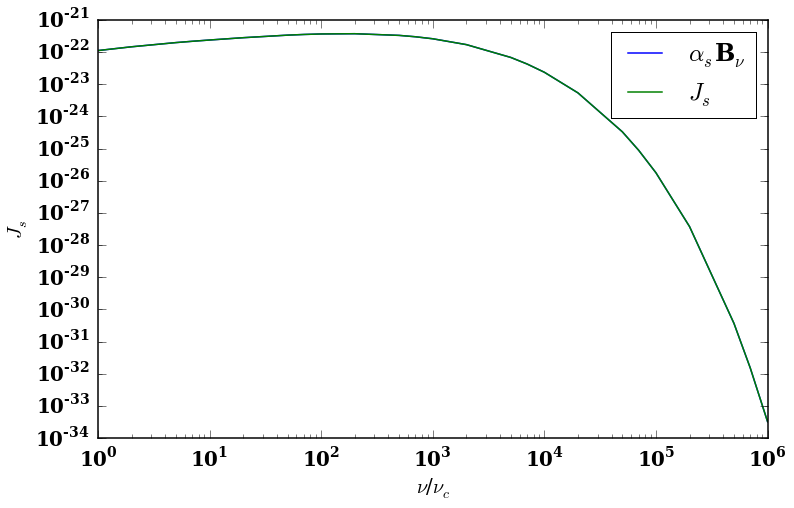

In [103]:
data2 = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_anu_K_I.txt')
data3 = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_data_varing_nu.txt')
T_e = theta_e * m * c**2 / k_Bol
def Planck_function(x):
    prefactor = 2. * h * x**3 / (c**2)
    tail = 1. / (np.exp(h * x / (k_Bol * T_e)) - 1.)
    ans = prefactor * tail
    return ans

alpha_B = Planck_function(data2[:,0] * nu_c) * data2[:,1]
#print alpha_B
pl.loglog(data2[:, 0], alpha_B, label = '$\\alpha$$_s$B$_\\nu$')
pl.loglog(data3[:, 0], data3[:, 1], label = '$J_s$')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$J_s$")
pl.legend()
pl.show()

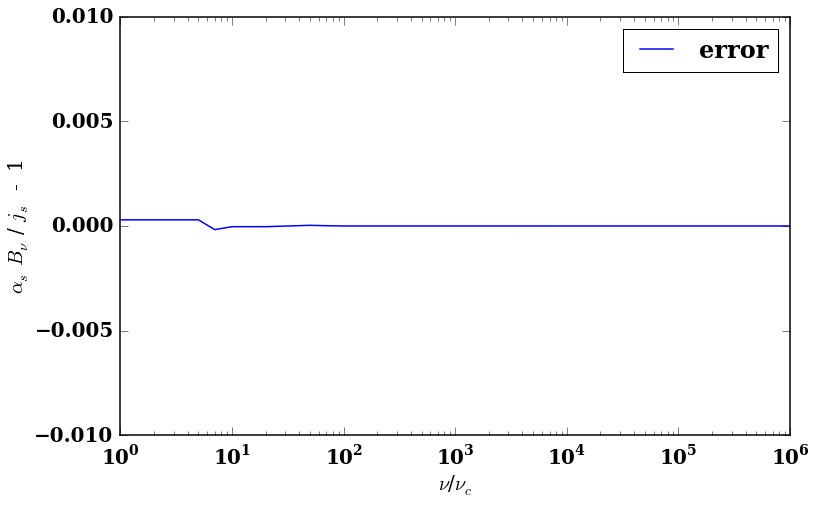

In [111]:
def error_here():
    
    error = alpha_B / data3[:, 1] - 1.
    
    return error
    
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$\\alpha$$_s$ $B$$_\\nu$ / $j_s$  -  1")

pl.semilogx(data3[:, 0], error_here(), label = 'error')
pl.ylim([-0.01,0.01])

pl.legend()
#pl.title("MJ error compared with Eq.72")
pl.show()

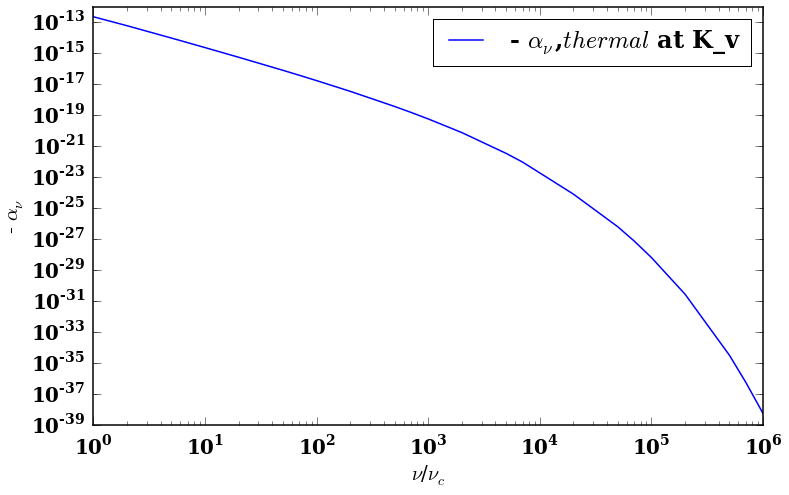

In [98]:
data = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_anu_kv.txt')
pl.loglog(data[:, 0], -data[:, 1], label = '- $\\alpha$$_\\nu$,$thermal$ at K_v')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("- $\\alpha$$_\\nu$")
pl.legend()
pl.show()

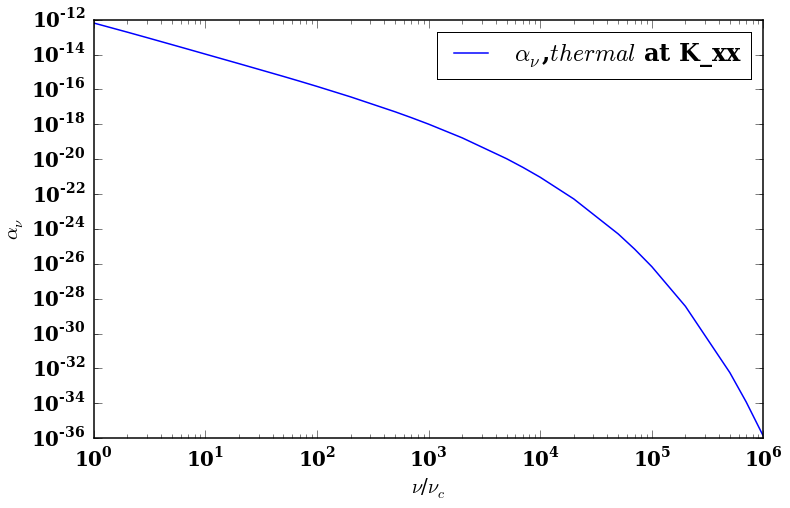

In [182]:
data1 = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_anu_K_xx.txt')
pl.loglog(data1[:, 0], data1[:, 1], label = '$\\alpha$$_\\nu$,$thermal$ at K_xx')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$\\alpha$$_\\nu$")
pl.legend()
pl.show()

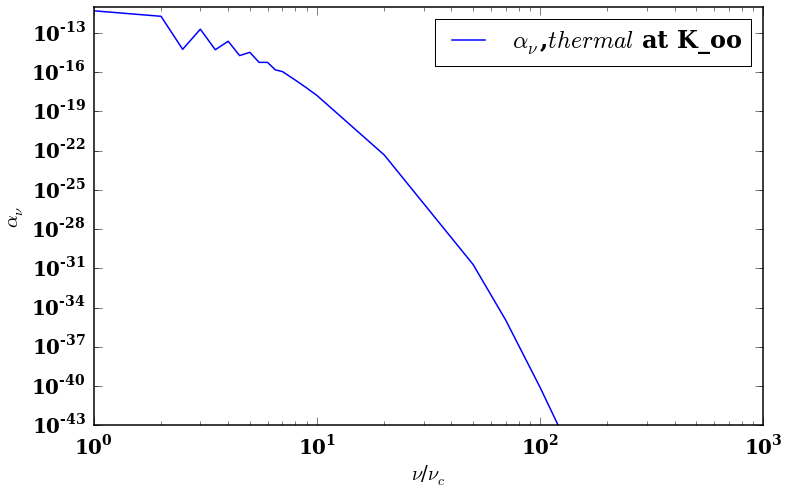

In [182]:
data4 = np.loadtxt('/Users/zbrawei/Documents/summer_new/my_data_1/thermal_anu_K_oo.txt')
pl.loglog(data4[:, 0], data4[:, 1], label = '$\\alpha$$_\\nu$,$thermal$ at K_oo')
pl.xlabel("$\\nu$/$\\nu_c$")
pl.ylabel("$\\alpha$$_\\nu$")
pl.legend()
pl.show()